# Scikit-learn ML 기본 동작

## 1) 데이터 수집 & 준비
## 2) 데이터 전처리
  - 데이터/타겟 분리
  - 데이터 표준화 / 정규화
  - 타겟(라벨) 인코딩
## 3) 학습을 위한 데이터 준비
  - 데이터셋 => 학습용 / 검증용 / 테스트용 데이터셋
    * 학습용: 학습에 사용
    * 검증용: 모델 생성중에 사용
    * 테스트용: 모델 완성 후에 사용
## 4) 학습 모델 생성
  - 학습 방법 선정 및 모델 객체 생성
  - 학습 진행
    - __모델 파라미터__ 최적화 => 학습에 의해서 결정되는 파라미터
      - ex) W가중치, b절편
    - 최적의 모델 파라미터를 찾기 위한 방법 => 최적화(optimizer)
  - 모델 평가
    - 성능 개선 => 하이퍼파라미터 (모델마다 다름) => 모델 튜닝
      - ex) KNN -> K, 학습회수, 학습크기(배치 사이즈), 규제값들  
        이 값들에 따라 과대 / 과소 / 적합 으로 다르게 나옴
## 5) 모델 테스트
  - 학습에 사용되지 않은 데이터
  - 새로운 데이터로 테스트 진행

In [9]:
# 모듈로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# [1] 데이터 준비
# 시간 : 점수
x=[2,4,6,8,10] # 시간
y=[40,50,60,70,80] # 점수

In [18]:
# 예제
df=pd.DataFrame([x,y])
print(df.shape)
print(df)

(2, 5)
    0   1   2   3   4
0   2   4   6   8  10
1  40  50  60  70  80


In [19]:
# [1]-1 학습에 사용되는 형태로 데이터 변환
df=pd.DataFrame({'Hour':x,'Score':y})
print(df.shape)
print(df)

(5, 2)
   Hour  Score
0     2     40
1     4     50
2     6     60
3     8     70
4    10     80


In [20]:
# 넘파이로 배열
arrx=np.array(x).reshape(-1,1)
arry=np.array(y).reshape(-1,1)

print(f'arrx: {arrx.shape} arry: {arry.shape}')

arrx: (5, 1) arry: (5, 1)


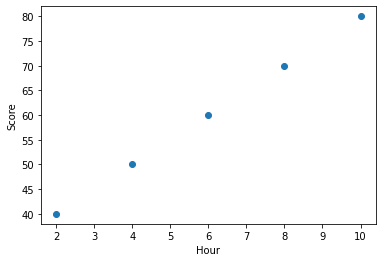

In [21]:
# [2] 데이터 분포 분석 => EDA => 시각화
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례 관계
- 선형의 데이터 분포
- 독립변수 => hour
- 종속변수 => score
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도 학습
- 선형 데이터 분포 => 선형 모델 적용

In [22]:
# [3] 학습 방법 선택 및 모델 생성
model=LinearRegression().fit(arrx,arry) # 객체 생성

In [23]:
# 모델 파라미터 => w  가중치, b 절편
print(f"w: {model.coef_}, b: {model.intercept_}")

w: [[5.]], b: [30.]


In [24]:
# 모델평가
model.score(arrx,arry)

1.0

In [25]:
# 회귀 => 결정계수 R^2
model.score(arrx,arry)

1.0

- score()
  - 분류: 정답과 예측답이 얼마나 맞는지 비교
    - 정확도(accuracy)
  - 회귀: 정답과 예측답이 얼마나 차이가 나는지(Error)
    - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE 등은 0~1 사이에 낮을수록 좋음
    - __R2계수 : 0~1사이에서 높을수록 좋음__

In [28]:
# 오차 확인
prey=model.predict(arrx)

mae=mean_absolute_error(arry,prey)
mse=mean_squared_error(arry,prey)

print(mae)
print(mse)

1.4210854715202005e-15
1.0097419586828952e-29
